# Graphs

Visualization of graphs as SVG images.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor, load_netset
from sknetwork.visualization import visualize_graph, visualize_bigraph

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels = graph.labels

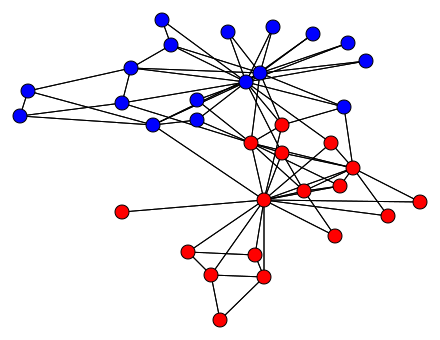

In [5]:
# graph
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [6]:
# export
image = visualize_graph(adjacency, position, labels=labels, filename='karate_club')

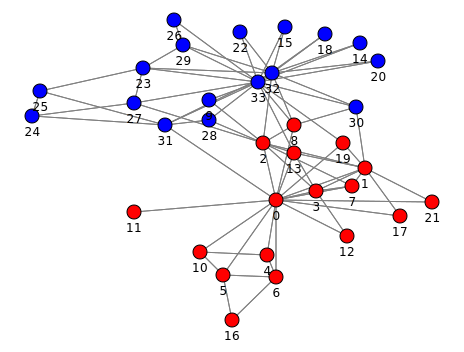

In [7]:
# adding names
image = visualize_graph(adjacency, position, names=np.arange(34), name_position='below', labels=labels)
SVG(image)

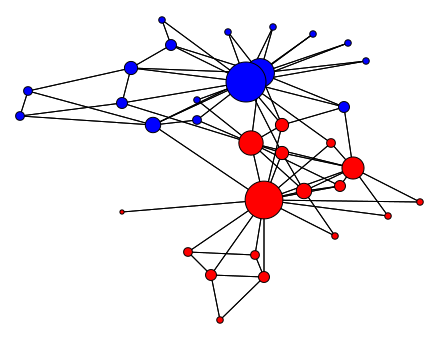

In [8]:
# node size
image = visualize_graph(adjacency, position, labels=labels, display_node_weight=True)
SVG(image)

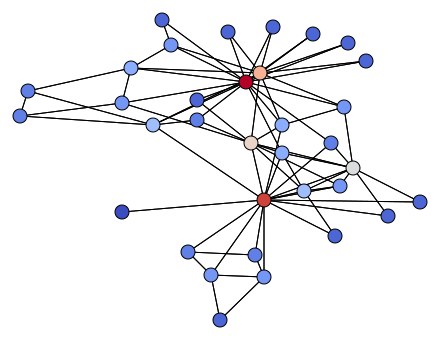

In [9]:
# scores (here = degrees)
degrees = adjacency.dot(np.ones(adjacency.shape[0]))
image = visualize_graph(adjacency, position, scores=degrees)
SVG(image)

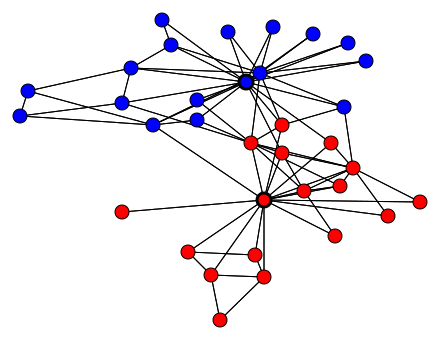

In [10]:
# seeds (here 2 nodes of highest degrees)
seeds = list(np.argsort(-degrees)[:2])
image = visualize_graph(adjacency, position, labels=labels, seeds=seeds)
SVG(image)

In [11]:
# no edge
graph = load_netset('openflights')
adjacency = graph.adjacency
position = graph.position


Parsing files...
Done.


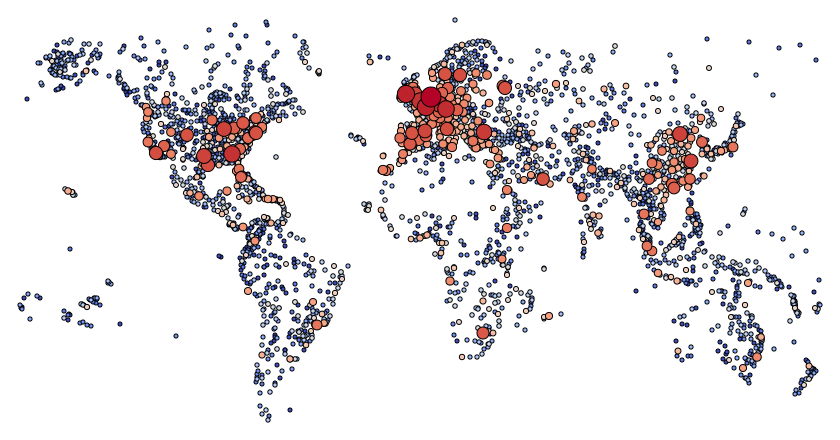

In [12]:
weights = adjacency.dot(np.ones(adjacency.shape[0]))
image = visualize_graph(adjacency, position, scores=np.log(weights), node_order=np.argsort(weights),
                  node_size_min=2, node_size_max=10, height=400, width=800,
                  display_node_weight=True, display_edges=False)
SVG(image)

## Directed graphs

In [9]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

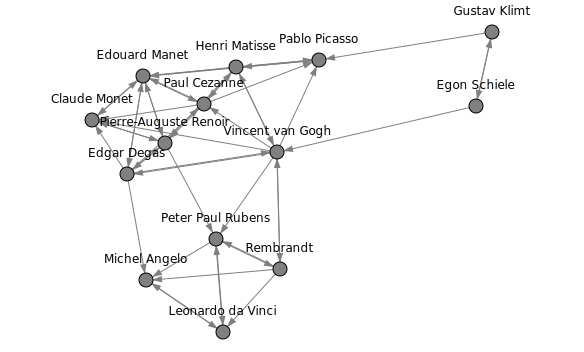

In [10]:
image = visualize_graph(adjacency, position, names, name_position='above')
SVG(image)

## Bipartite graphs

In [15]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

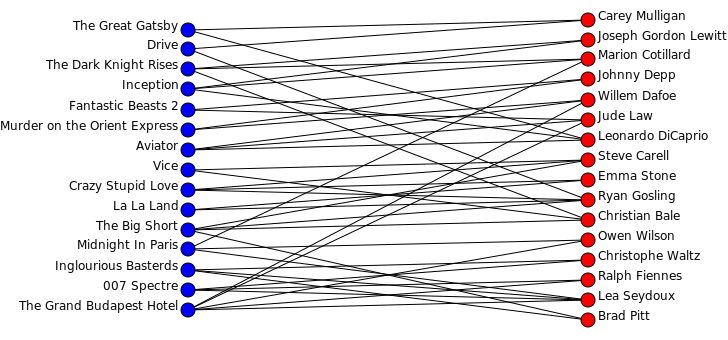

In [16]:
# default layout
image = visualize_bigraph(biadjacency, names_row, names_col, color_row='blue', color_col='red')
SVG(image)

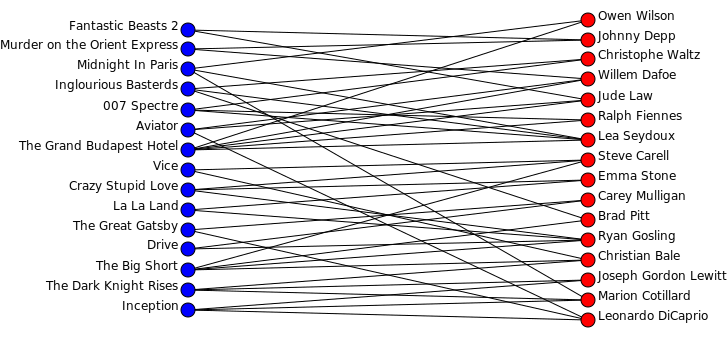

In [17]:
# keep original order of rows and columns
image = visualize_bigraph(biadjacency, names_row, names_col=names_col, color_row='blue', color_col='red',
                    reorder=False)
SVG(image)
